In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import math

import plotly.express as px
import sqlite3

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score as shs

# import warnings
# warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv(r'C:\Users\pauli\Downloads\customer-segmentation-tutorial-in-python\versions\1\Mall_Customers.csv')

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


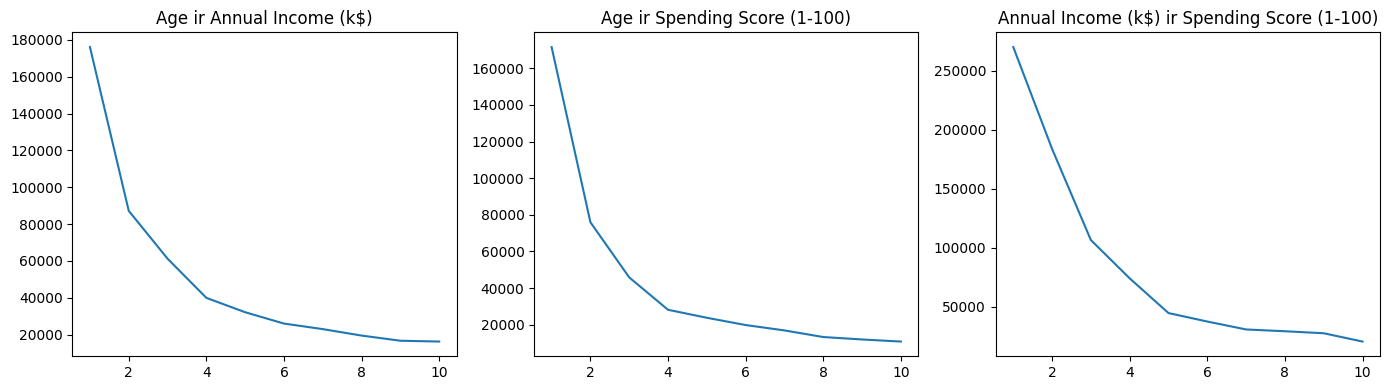

In [66]:
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(14, 4))

axes = axes.flatten()

sse = []
for k in range(1,11):
        km = KMeans(n_clusters=k)
        km.fit(df[['Age', 'Annual Income (k$)']])
        sse.append(km.inertia_)
ax = sns.lineplot(x=[*range(1,11)], y=sse, ax=axes[0]) 
axes[0].set_title('Age ir Annual Income (k$)')

sse = []
for k in range(1,11):
        km = KMeans(n_clusters=k)
        km.fit(df[['Age', 'Spending Score (1-100)']])
        sse.append(km.inertia_)
ax = sns.lineplot(x=[*range(1,11)], y=sse, ax=axes[1]) 
axes[1].set_title('Age ir Spending Score (1-100)')

sse = []
for k in range(1,11):
        km = KMeans(n_clusters=k)
        km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
        sse.append(km.inertia_)
ax = sns.lineplot(x=[*range(1,11)], y=sse, ax=axes[2]) 
axes[2].set_title('Annual Income (k$) ir Spending Score (1-100)')

plt.tight_layout()
plt.show()

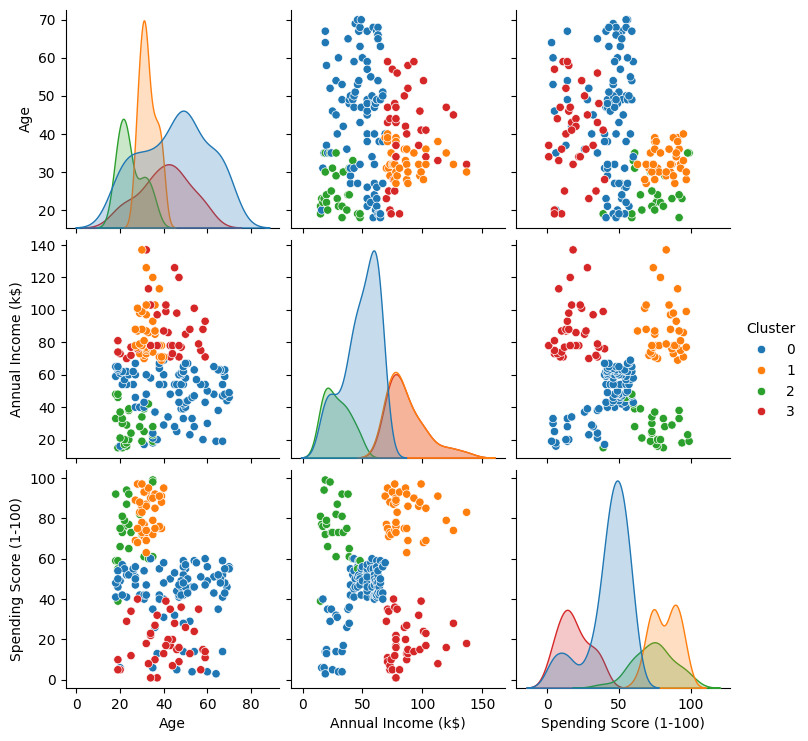

In [90]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='tab10')
plt.show()

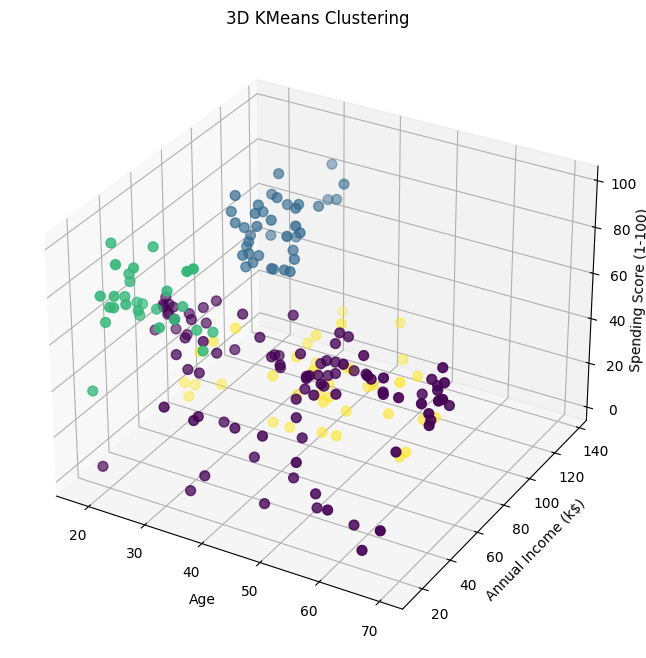

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)

# Labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)', labelpad=0)
ax.set_title('3D KMeans Clustering')
plt.show()

In [69]:
df['dbscan'] = DBSCAN(eps=1, min_samples=2).fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

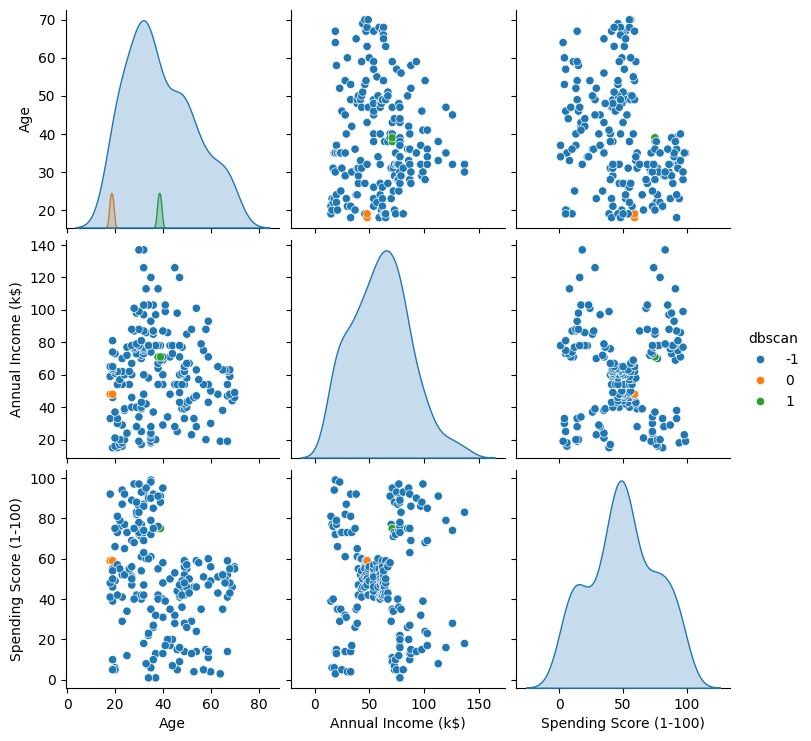

In [91]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'dbscan']], hue='dbscan', palette='tab10')
plt.show()

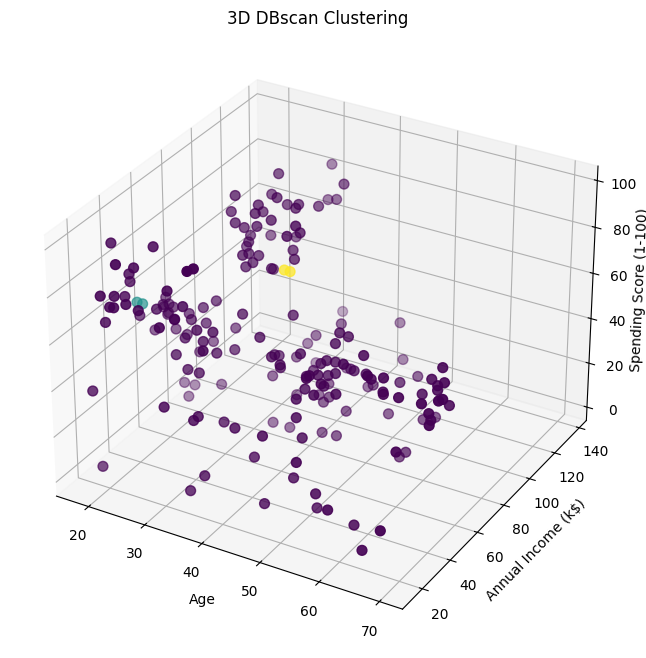

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['dbscan'], s=50,)

# Labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)', labelpad=0)
ax.set_title('3D DBscan Clustering')
plt.show()

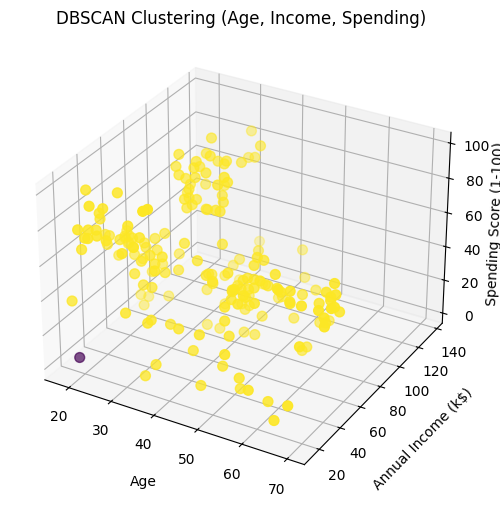

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Selecting three columns for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.05, min_samples=3)  # Adjust eps & min_samples as needed
df['dbscanAI'] = dbscan.fit_predict(X_scaled)

# Visualizing in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['dbscanAI'], s=50)

# Labels
ax.set_xlabel('Age', labelpad=10)
ax.set_ylabel('Annual Income (k$)', labelpad=10)
ax.set_zlabel('Spending Score (1-100)', labelpad=1)
ax.set_title('DBSCAN Clustering (Age, Income, Spending)')

plt.show()